In [1]:
cd /Users/carolinecharrier/Projet 5

/Users/carolinecharrier/Projet 5


In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
import pandas as pd
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

In [3]:
# import de l'échantillon
data = pd.read_csv("good_df_2.csv")
data.index = data.country
data

,Unnamed: 0,country,conso_volailles_ktons,ratio_conso_volailles_viande_total,ratio_import_conso_volailles,population_growth,ani_prot_share,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,PIB_value_$,political_stability_value,ISO_code,Paris_cities_distance_km
country,,,,,,,,,,,,,
Arménie,0,Arménie,40.0,26.490066,0.800000,-1.943347,48.012436,2924.0,90.06,7717.1,0.11,ARM,3435.0
Afghanistan,1,Afghanistan,75.0,17.441860,0.640000,32.168195,20.957775,2087.0,58.26,1807.8,-2.52,AFG,5586.0
Albanie,2,Albanie,42.0,20.192308,0.595238,-2.037666,53.344707,3188.0,111.37,10492.7,0.09,ALB,1600.0
Algérie,3,Algérie,291.0,32.955832,0.010309,18.801321,27.175805,3293.0,91.92,13322.6,-1.20,DZA,1340.0
Angola,4,Angola,372.0,46.441948,0.919355,39.238700,32.128514,2474.0,57.27,6730.9,-0.39,AGO,6505.0
Antigua-et-Barbuda,5,Antigua-et-Barbuda,5.0,71.428571,1.200000,11.111111,68.068032,2416.0,83.49,20121.3,0.96,ATG,6713.0
Argentine,6,Argentine,1602.0,34.267380,0.002497,9.154596,65.233918,3226.0,102.60,19637.8,0.07,ARG,11058.0
Australie,7,Australie,1077.0,37.137931,0.015785,16.989926,67.466591,3278.0,106.26,43218.3,1.03,AUS,16942.0
Autriche,8,Autriche,158.0,20.153061,0.664557,4.335544,59.190207,3770.0,106.20,44301.1,1.36,AUT,1035.0


In [5]:
# Selection des colonnes pour l'experience 1
data_pca = data[["population_growth","ani_prot_share","food_supply_kcalcapitaday","protein_supply_quantity_gcapitaday"]]
data_pca = data_pca.fillna(data_pca.mean()) 

### Dendrogramme

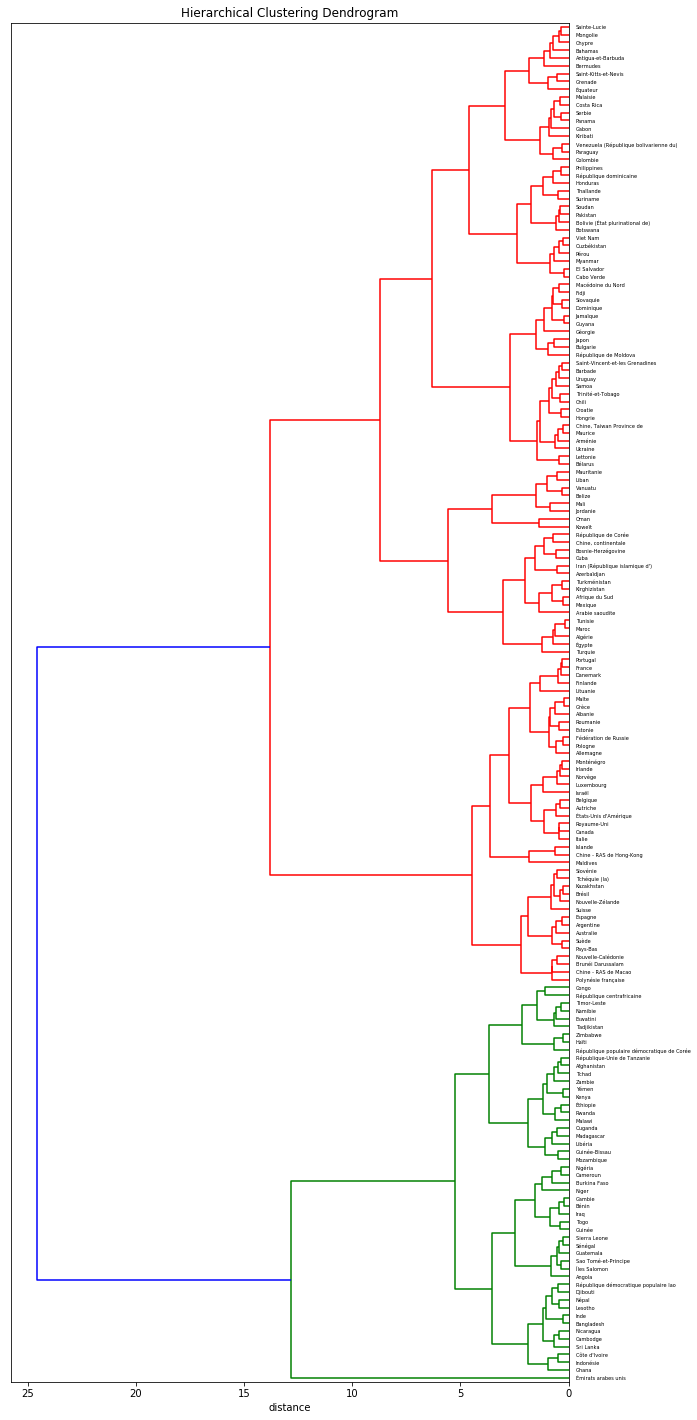

In [7]:
# préparation des données pour le clustering
X = data_pca.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

In [8]:
## Cluster de dendrogramme 
dendro_cluster = fcluster(Z, 5, criterion = "maxclust")

In [9]:
# Association des pays avec numéro de cluster Dendro
df_dcluster = pd.DataFrame({"Dendro_cluster" : dendro_cluster, "country" : data.country})
df_dcluster.groupby('Dendro_cluster').describe()

country                                 
                 count unique                  top freq
Dendro_cluster                                         
1                   50     50          Tadjikistan    1
2                    1      1  Émirats arabes unis    1
3                   42     42   Nouvelle-Calédonie    1
4                   24     24                 Oman    1
5                   57     57              Barbade    1

([<matplotlib.patches.Wedge at 0x1a2175f6d8>,
 [Text(0.6813932103477297, 0.8635411356108144, 'cluster 1'),
  Text(-0.2750974925827923, 1.0650452429707673, 'cluster 2'),
  Text(-0.9425428683803709, 0.5671092851164605, 'cluster 3'),
  Text(-0.8757024128421934, -0.6656915833494973, 'cluster 4'),
  Text(0.5671091748074161, -0.9425429347511188, 'cluster 5')],
 [Text(0.37166902382603434, 0.4710224376058987, '28.7%'),
  Text(-0.15005317777243216, 0.5809337688931457, '0.6%'),
  Text(-0.5141142918438386, 0.30933233733625115, '24.1%'),
  Text(-0.4776558615502873, -0.36310450000881667, '13.8%'),
  Text(0.30933227716768147, -0.5141143280460648, '32.8%')])

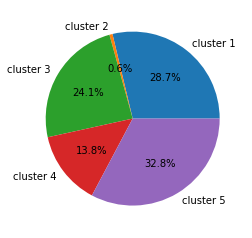

In [35]:
df_pie = df_dcluster.groupby('Dendro_cluster').count()
plt.pie(df_pie.country, labels = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'],autopct = lambda x: str(round(x, 1)) + '%')




In [12]:
data_dcluster = pd.merge(data_pca,df_dcluster,on='country',how='left')

/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: FutureWarning: 'country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
data_dcluster.loc[data_dcluster['Dendro_cluster'] == 5]

,country,population_growth,ani_prot_share,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,Dendro_cluster
0,Arménie,-1.943347,48.012436,2924.0,90.06,5
5,Antigua-et-Barbuda,11.111111,68.068032,2416.0,83.49,5
9,Bahamas,19.303797,65.506035,2670.0,86.16,5
10,Barbade,5.166052,56.917530,2936.0,88.76,5
12,Bermudes,1.562500,66.710934,2668.0,90.36,5
13,Bolivie (État plurinational de),18.343130,45.118253,2250.0,65.96,5
14,Botswana,10.256410,40.755590,2325.0,64.85,5
19,Bulgarie,-7.480466,49.514447,2828.0,83.41,5
20,Myanmar,7.426831,40.830408,2574.0,82.61,5
23,Cabo Verde,6.852248,37.926349,2605.0,73.59,5


### Centroides

In [21]:
# Affichage des centroides en considérant la moyenne de chaque variable 
dd_centroids = data_dcluster.groupby('Dendro_cluster').mean().T

### ACP 

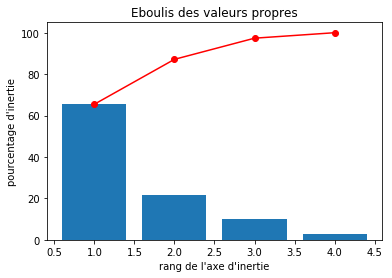

In [15]:
# choix du nombre de composantes à calculer
n_comp = 4

# préparation des données pour l'ACP
X = data_pca.values
names = data.index
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

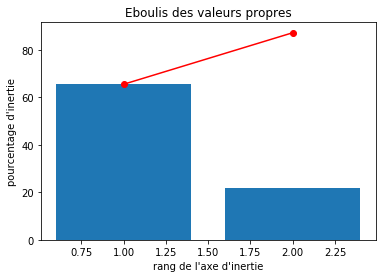

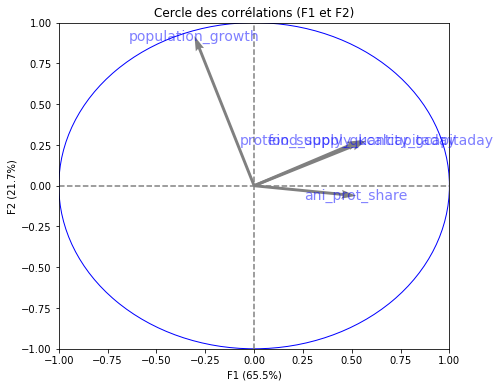

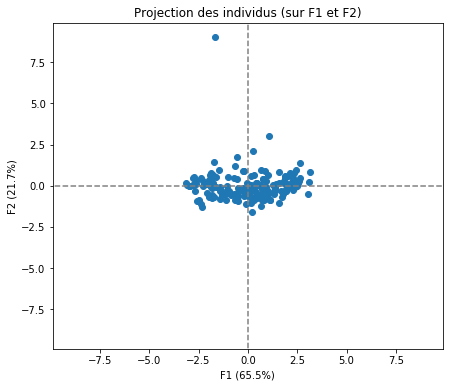

In [17]:
# choix du nombre de composantes à calculer
n_comp = 2

# préparation des données pour l'ACP
data_pca = data[["population_growth","ani_prot_share","food_supply_kcalcapitaday","protein_supply_quantity_gcapitaday"]]
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data.index
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)])


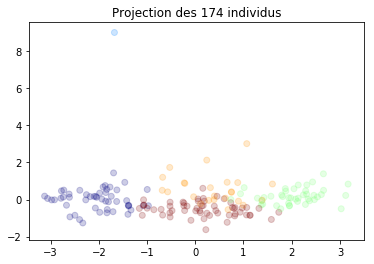

In [19]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_comp).fit(X_scaled)
X_projected = pca.transform(X_scaled)

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=dendro_cluster.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus".format(X_projected.shape[0]))
plt.show(block=False)


In [22]:
dd_centroids

Dendro_cluster,1,2,3,4,5
population_growth,25.835183,177.411695,7.996676,20.689606,8.407576
ani_prot_share,22.923791,39.900488,60.027967,37.232361,49.849257
food_supply_kcalcapitaday,2379.680000,3275.000000,3333.928571,3150.375000,2764.017544
protein_supply_quantity_gcapitaday,59.306800,104.510000,106.393571,90.214167,77.922982


In [25]:
## Verifier la selection de df centroides
plt.figure()
centroids = dd_centroids
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres".format(len(centroids)))
plt.show()

ValueError: operands could not be broadcast together with shapes (4,5) (4,) 

<Figure size 432x288 with 0 Axes>

In [38]:
principalDf = pd.DataFrame(data = X_projected,index = data_pca.index
             , columns = ['principal component 1', 'principal component 2'])
principalDf.sort_values('principal component 2',ascending = True).head()

,principal component 1,principal component 2
country,,
République de Moldova,0.219116,-1.624120
République populaire démocratique de Corée,-2.333448,-1.263433
Bulgarie,0.661454,-1.228491
Grenade,-0.090150,-1.119742
Zimbabwe,-2.400325,-1.080865


In [36]:
data_pca.sort_values('protein_supply_quantity_gcapitaday',ascending = False).head()

,population_growth,ani_prot_share,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday
country,,,,
Islande,13.793103,72.508643,3381.0,133.06
Chine - RAS de Hong-Kong,4.299986,73.138607,3286.0,129.07
Israël,21.798708,56.609375,3610.0,128.00
Lituanie,-10.686797,61.506915,3414.0,124.36
Maldives,19.791667,70.282865,2733.0,122.32


In [46]:
df_ACP_exp1 = pd.DataFrame(data = pcs,index = ['principal component 1', 'principal component 2'], columns = ['population_growth','ani_prot_share','food_supply_kcalcapitaday','protein_supply_quantity_gcapitaday']).T

df_ACP_exp1['Total_contribution'] = np.sqrt(df_ACP_exp1['principal component 1']**2 +df_ACP_exp1['principal component 2']**2)
                                            
df_ACP_exp1                                      
                                            

,principal component 1,principal component 2,Total_contribution
population_growth,-0.305398,0.917609,0.967096
ani_prot_share,0.522699,-0.061595,0.526315
food_supply_kcalcapitaday,0.550660,0.279433,0.617503
protein_supply_quantity_gcapitaday,0.574710,0.275894,0.637502


### Tests statistiques

42.77
16.15
260.98


Text(0.5, 1.0, 'histogramme')

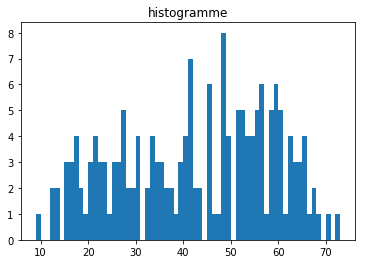

In [65]:
# Calcul de la moyenne, la variance et l’écart-type de l’échantillon : ani_prot_share
import numpy, math
xbar=numpy.mean(data_pca['ani_prot_share'])
print(round(xbar,2))
sprime = numpy.std(data_pca['ani_prot_share'], ddof=1)
print(round(sprime,2))
n_ani_prot_share = len(data_pca)
sprime2 = numpy.var(data_pca['ani_prot_share'], ddof=1)
print(round(sprime2,2))

# Visualisation de l'histogramme
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data_pca['ani_prot_share'],bins=range(9,74))
plt.title("histogramme")


15.98
17.7
313.38


Text(0.5, 1.0, 'Population_growth hist')

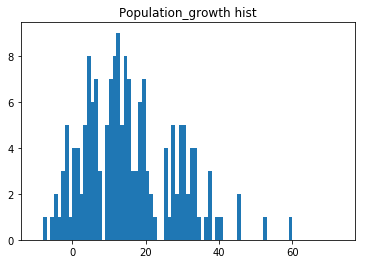

In [96]:
# Calcul de la moyenne, la variance et l’écart-type de l’échantillon : population_growth
import numpy, math
xbar=numpy.mean(data_pca['population_growth'])
print(round(xbar,2))
sprime = numpy.std(data_pca['population_growth'], ddof=1)
print(round(sprime,2))
n_population_growth = len(data_pca)
sprime2 = numpy.var(data_pca['population_growth'], ddof=1)
print(round(sprime2,2))

# Visualisation de l'histogramme
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data_pca['population_growth'],bins=range(-10,74))
plt.title("Population_growth hist")

In [69]:
data_pca.population_growth.max()

177.4116948649451

2847.37
438.55
192323.39


Text(0.5, 1.0, 'histogramme')

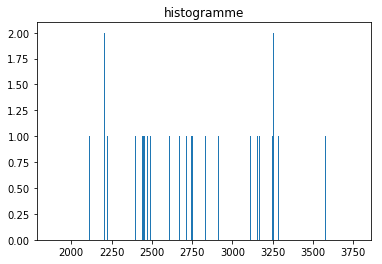

In [76]:
# Calcul de la moyenne, la variance et l’écart-type de l’échantillon : food_supply_kcalcapitaday
import numpy, math
xbar=numpy.mean(data_pca['food_supply_kcalcapitaday'])
print(round(xbar,2))
sprime = numpy.std(data_pca['food_supply_kcalcapitaday'], ddof=1)
print(round(sprime,2))
n_food_supply_kcalcapitaday = len(data_pca)
sprime2 = numpy.var(data_pca['food_supply_kcalcapitaday'], ddof=1)
print(round(sprime2,2))

# Visualisation de l'histogramme
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data_pca['food_supply_kcalcapitaday'],bins=range(1879,3770))
plt.title("histogramme")

81.29
19.96
398.32


Text(0.5, 1.0, 'histogramme')

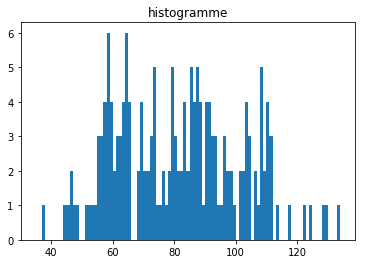

In [80]:
# Calcul de la moyenne, la variance et l’écart-type de l’échantillon : protein_supply_quantity_gcapitaday
import numpy, math
xbar=numpy.mean(data_pca['protein_supply_quantity_gcapitaday'])
print(round(xbar,2))
sprime = numpy.std(data_pca['protein_supply_quantity_gcapitaday'], ddof=1)
print(round(sprime,2))
n_protein_supply_quantity_gcapitaday = len(data_pca)
sprime2 = numpy.var(data_pca['protein_supply_quantity_gcapitaday'], ddof=1)
print(round(sprime2,2))

# Visualisation de l'histogramme
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data_pca['protein_supply_quantity_gcapitaday'],bins=range(35,135))
plt.title("histogramme")

In [86]:
from scipy.stats import ks_2samp
print(ks_2samp(data_pca['ani_prot_share'],list(numpy.random.normal(numpy.mean(data_pca['ani_prot_share']), numpy.std(data_pca['ani_prot_share']), 1000))))
print(ks_2samp(data_pca['protein_supply_quantity_gcapitaday'],list(numpy.random.normal(numpy.mean(data_pca['protein_supply_quantity_gcapitaday']), numpy.std(data_pca['protein_supply_quantity_gcapitaday']), 1000))))
print(ks_2samp(data_pca['food_supply_kcalcapitaday'],list(numpy.random.normal(numpy.mean(data_pca['food_supply_kcalcapitaday']), numpy.std(data_pca['food_supply_kcalcapitaday']), 1000))))
print(ks_2samp(data_pca['population_growth'],list(numpy.random.normal(numpy.mean(data_pca['population_growth']), numpy.std(data_pca['population_growth']), 1000))))


Ks_2sampResult(statistic=0.0975172413793104, pvalue=0.11236928068258316)
Ks_2sampResult(statistic=0.0875977011494253, pvalue=0.19576870767256355)
Ks_2sampResult(statistic=0.07563218390804594, pvalue=0.35199141506385073)
Ks_2sampResult(statistic=0.12088505747126443, pvalue=0.02397256686586015)


In [92]:
data_dcluster.head()

,country,population_growth,ani_prot_share,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,Dendro_cluster
0,Arménie,-1.943347,48.012436,2924.0,90.06,5
1,Afghanistan,32.168195,20.957775,2087.0,58.26,1
2,Albanie,-2.037666,53.344707,3188.0,111.37,3
3,Algérie,18.801321,27.175805,3293.0,91.92,4
4,Angola,39.238700,32.128514,2474.0,57.27,1


In [98]:
import scipy.stats
pop_cluster1 = data_dcluster[data_dcluster["Dendro_cluster"]==1]["population_growth"]
pop_cluster3 = data_dcluster[data_dcluster["Dendro_cluster"]==3]["population_growth"]
print(scipy.stats.bartlett(pop_cluster1,pop_cluster3))
print(scipy.stats.ttest_ind(pop_cluster1,pop_cluster3, equal_var=True))


BartlettResult(statistic=1.97117001271434, pvalue=0.16032372646993182)
Ttest_indResult(statistic=9.83478954915602, pvalue=6.297375108027022e-16)


In [104]:
import scipy.stats
pop_cluster1 = data_dcluster[data_dcluster["Dendro_cluster"]==1]["population_growth"]
pop_cluster4 = data_dcluster[data_dcluster["Dendro_cluster"]==4]["population_growth"]
print(scipy.stats.bartlett(pop_cluster1,pop_cluster4))
print(scipy.stats.ttest_ind(pop_cluster1,pop_cluster4, equal_var=True))

BartlettResult(statistic=8.681037072925589, pvalue=0.003215379677320543)
Ttest_indResult(statistic=1.7535722998069807, pvalue=0.08375958421215635)


In [100]:
import scipy.stats
pop_cluster1 = data_dcluster[data_dcluster["Dendro_cluster"]==1]["population_growth"]
pop_cluster5 = data_dcluster[data_dcluster["Dendro_cluster"]==5]["population_growth"]
print(scipy.stats.bartlett(pop_cluster1,pop_cluster5))
print(scipy.stats.ttest_ind(pop_cluster1,pop_cluster5, equal_var=True))


BartlettResult(statistic=0.22445498009587764, pvalue=0.6356662125604544)
Ttest_indResult(statistic=9.851677635832958, pvalue=1.3196871830248965e-16)


In [101]:
import scipy.stats
pop_cluster3 = data_dcluster[data_dcluster["Dendro_cluster"]==3]["population_growth"]
pop_cluster4 = data_dcluster[data_dcluster["Dendro_cluster"]==4]["population_growth"]
print(scipy.stats.bartlett(pop_cluster3,pop_cluster4))
print(scipy.stats.ttest_ind(pop_cluster3,pop_cluster4, equal_var=True))


BartlettResult(statistic=15.929200399446984, pvalue=6.575638073513665e-05)
Ttest_indResult(statistic=-4.417862252006048, pvalue=3.928818888630389e-05)


In [102]:
import scipy.stats
pop_cluster3 = data_dcluster[data_dcluster["Dendro_cluster"]==3]["population_growth"]
pop_cluster5 = data_dcluster[data_dcluster["Dendro_cluster"]==5]["population_growth"]
print(scipy.stats.bartlett(pop_cluster3,pop_cluster5))
print(scipy.stats.ttest_ind(pop_cluster3,pop_cluster5, equal_var=True))


BartlettResult(statistic=1.002292475410267, pvalue=0.31675643103084206)
Ttest_indResult(statistic=-0.2419122554949697, pvalue=0.8093588543201103)


In [103]:
import scipy.stats
pop_cluster4 = data_dcluster[data_dcluster["Dendro_cluster"]==4]["population_growth"]
pop_cluster5 = data_dcluster[data_dcluster["Dendro_cluster"]==5]["population_growth"]
print(scipy.stats.bartlett(pop_cluster4,pop_cluster5))
print(scipy.stats.ttest_ind(pop_cluster4,pop_cluster5, equal_var=True))


BartlettResult(statistic=11.873428788898366, pvalue=0.0005694048628133284)
Ttest_indResult(statistic=4.472445988535336, pvalue=2.5593093967854084e-05)
